In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
import os
import wave
import glob

In [4]:
from scipy.io import wavfile
from scipy import fft
from scipy import signal
from matplotlib import cm
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.fft import fftshift
from scipy.spatial.distance import cdist
import librosa

In [5]:
#import neural models to help with detection 

from tensorflow import keras
from keras import layers
from keras import Input
from keras.layers import Conv1D, Conv2D, MaxPool1D, MaxPool2D, GlobalAvgPool1D, Dropout, BatchNormalization, Dense, LSTM, Flatten
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.regularizers import l2
from keras import backend as K

In [53]:
# Specify the folder containing the .wav files
folder_path = '/Users/kerichen/Downloads/Animals/bird'

# Use glob to find all .wav files in the folder
files = glob.glob(os.path.join(folder_path, '*.wav'))

In [9]:
librosa.load('/Users/kerichen/Downloads/Animals/bird/0a7c2a8d_nohash_0.wav')

(array([-0.00014037,  0.00117776, -0.00058977, ...,  0.00038463,
         0.00082914,  0.00069896], dtype=float32),
 22050)

In [72]:
#Define a function to help us get the features for each of the dataset

def get_features(files):
    X = []
    spectrograms = []
    mel_spectrograms = []
    mfccs = []

    for file in files:
        wav, sr = librosa.load(file, sr=None)

        spectrogram = np.abs(librosa.stft(wav))

        mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sr)

        mfcc = librosa.feature.mfcc(y=wav, sr=sr)

        X.append(wav)
        spectrograms.append(spectrogram)
        mel_spectrograms.append(mel_spectrogram)
        mfccs.append(mfcc)
        
    # Pad sequences to ensure consistent shape for batch processing
    max_length = max(map(len, X))
    X = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in X])

    # Ensure spectrogram, mel spectrogram, and MFCC have the same shape
    spectrograms = np.array([np.pad(s, ((0, 0), (0, max_length - s.shape[1])), 'constant') for s in spectrograms])
    mel_spectrograms = np.array([np.pad(m, ((0, 0), (0, max_length - m.shape[1])), 'constant') for m in mel_spectrograms])
    mfccs = np.array([np.pad(m, ((0, 0), (0, max_length - m.shape[1])), 'constant') for m in mfccs])
    
    return X, spectrograms, mel_spectrograms, mfccs

In [11]:
x_data_bird, spectrograms_bird, mel_spectrograms_bird, mfcss_bird = get_features(bird_files)

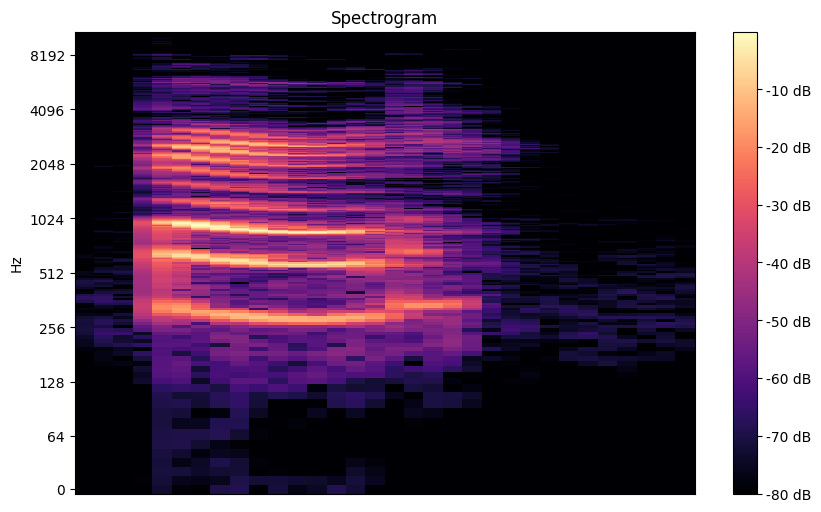

In [15]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_data_bird[0])), ref=np.max)


plt.figure(figsize = (10, 6))
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram');

In [15]:
# Specify the folder containing the .wav files
folder_path = '/Users/kerichen/Downloads/Animals/cat'

# Use glob to find all .wav files in the folder
cat_files = glob.glob(os.path.join(folder_path, '*.wav'))

# Iterate through the list of .wav files
#for cat_file in cat_files:
    # Open the .wav file
    #with wave.open(cat_file, 'rb') as wav_obj:
        # Extract and print some properties of the .wav file
       # print(f"Processing file: {wav_file}")
       # print(f"Number of channels: {wav_obj.getnchannels()}")
       # print(f"Sample width (bytes): {wav_obj.getsampwidth()}")
       # print(f"Frame rate (sample rate): {wav_obj.getframerate()}")
       # print(f"Number of frames: {wav_obj.getnframes()}")
       # print(f"Compression type: {wav_obj.getcomptype()}")
       # print(f"Compression name: {wav_obj.getcompname()}")
       # print("\n")

       #print (cat_file)

In [16]:
x_data_cat, spectrograms_cat, mel_spectrograms_cat, mfcss_cat = get_features(cat_files)

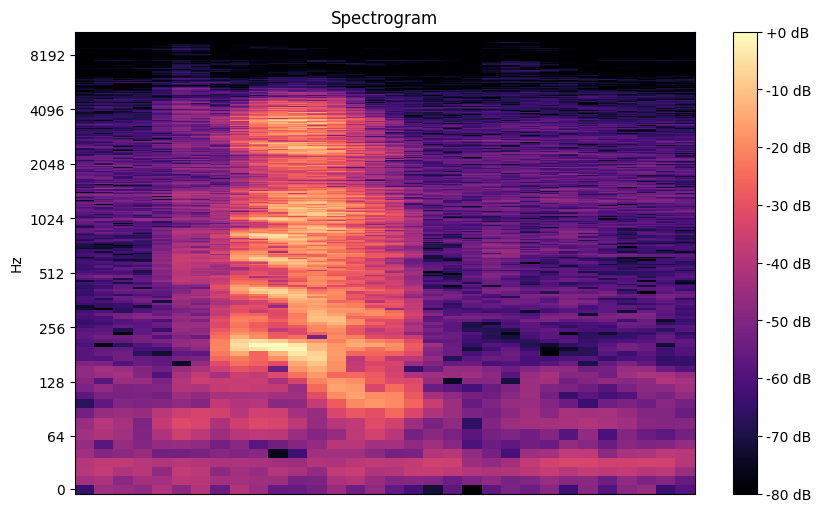

In [17]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_data_cat[0])), ref=np.max)


plt.figure(figsize = (10, 6))
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram');

In [18]:
# Specify the folder containing the .wav files
folder_path = '/Users/kerichen/Downloads/Animals/dog'

# Use glob to find all .wav files in the folder
dog_files = glob.glob(os.path.join(folder_path, '*.wav'))

# Iterate through the list of .wav files
#for dog_file in dog_files:
    # Open the .wav file
 #   with wave.open(dog_file, 'rb') as wav_obj:
        # Extract and print some properties of the .wav file
       # print(f"Processing file: {wav_file}")
       # print(f"Number of channels: {wav_obj.getnchannels()}")
       # print(f"Sample width (bytes): {wav_obj.getsampwidth()}")
       # print(f"Frame rate (sample rate): {wav_obj.getframerate()}")
       # print(f"Number of frames: {wav_obj.getnframes()}")
       # print(f"Compression type: {wav_obj.getcomptype()}")
       # print(f"Compression name: {wav_obj.getcompname()}")
       # print("\n")

      #  print (dog_file)

In [ ]:
x_data_dog, spectrograms_dog, mel_spectrograms_dog, mfcss_dog = get_features(dog_files)

In [45]:
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the path to your dataset
data_path = '/Users/kerichen/Downloads/Animals/'

# Function to extract features from an audio file
def extract_features(file_path, n_fft=512):

    audio, sample_rate = librosa.load(file_path)

    
    # Ensure n_fft is appropriate for the length of the signal
    n_fft = min(n_fft, len(audio))
    
    # Compute various features
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate).T, axis=0)
    
    return np.hstack([mfccs, chroma, mel, contrast, tonnetz])


# Initialize lists to hold features and labels
features = []
labels = []

# Iterate over each class folder and extract features
for label in ['bird', 'cat', 'dog']:
    class_folder = os.path.join(data_path, label)
    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)
        if file_name.endswith('.wav'):
            features.append(extract_features(file_path))
            labels.append(label)

# Convert lists to numpy arrays
X = np.array(features)
y = np.array(labels)


In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [47]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes: bird, cat, dog

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 32.2614 - accuracy: 0.3074 - val_loss: 2.4202 - val_accuracy: 0.4098
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 17.0645 - accuracy: 0.3484 - val_loss: 1.7956 - val_accuracy: 0.4672
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 10.5730 - accuracy: 0.3607 - val_loss: 1.4316 - val_accuracy: 0.4016
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 7.6074 - accuracy: 0.3689 - val_loss: 1.5816 - val_accuracy: 0.3852
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 5.9829 - accuracy: 0.3402 - val_loss: 1.1613 - val_accuracy: 0.3852
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 5.2817 - accuracy: 0.3053 - val_loss: 1.1444 - val_accuracy: 0.3607
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 4.0277 - accuracy: 0.3135 - val_loss: 1.1478 - val_accuracy: 0.3770
Epoch 8/50
16/16 

In [49]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')


4/4 - 0s - loss: 1.0603 - accuracy: 0.3852 - 27ms/epoch - 7ms/step
Test accuracy: 0.3852458894252777


In [55]:
# Function to predict the class of a new audio file
def predict_audio_class(file_path):
    features = extract_features(file_path)
    features = features.reshape(1, -1)
    prediction = model.predict(features)
    predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_class[0]

# Example usage
new_file_path = '/Users/kerichen/Downloads/Animals/dog/31e686d2_nohash_2.wav'
predicted_class = predict_audio_class(new_file_path)
print(f'The predicted class for the audio file is: {predicted_class}')


/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=345
  warnings.warn(


1/1 [==============================] - 0s 252ms/step
The predicted class for the audio file is: dog


In [57]:
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the path to your dataset
data_path = '/Users/kerichen/Downloads/Animals/'

# Function to extract features from an audio file
def extract_features(file_path, n_fft=512):

    audio, sample_rate = librosa.load(file_path)

    
    # Ensure n_fft is appropriate for the length of the signal
    n_fft = min(n_fft, len(audio))
    
    # Compute various features
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate).T, axis=0)
    
    #return np.hstack([mfccs, chroma, mel, contrast, tonnetz])
    return mel


# Initialize lists to hold features and labels
features = []
labels = []

# Iterate over each class folder and extract features
for label in ['bird', 'cat', 'dog']:
    class_folder = os.path.join(data_path, label)
    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)
        if file_name.endswith('.wav'):
            features.append(extract_features(file_path))
            labels.append(label)

# Convert lists to numpy arrays
X = np.array(features)
y = np.array(labels)


/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=545
  warnings.warn(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=273
  warnings.warn(


In [58]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [62]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25,
                                                                                    #stratify splitting to ensure same target % in training and test sets
                                                                                     stratify = y_encoded,
                                                                                     #set random state to reproduce the same train-test split output
                                                                                     random_state = 0)

In [63]:
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)

In [ ]:
# x_train_cnn[0]
x_train.shape
x_train_cnn.shape

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Reshape input data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(128, 5, padding='same', input_shape=(X_train_cnn.shape[1], 1), activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(32, 5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes: bird, cat, dog, other

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/50
16/16 [==============================] - 1s 22ms/step - loss: 1.3677 - accuracy: 0.3299 - val_loss: 1.2584 - val_accuracy: 0.5574
Epoch 2/50
16/16 [==============================] - 0s 13ms/step - loss: 1.1837 - accuracy: 0.4098 - val_loss: 1.0829 - val_accuracy: 0.4918
Epoch 3/50
16/16 [==============================] - 0s 13ms/step - loss: 1.0497 - accuracy: 0.4693 - val_loss: 1.0338 - val_accuracy: 0.5328
Epoch 4/50
16/16 [==============================] - 0s 14ms/step - loss: 1.0607 - accuracy: 0.4775 - val_loss: 1.0088 - val_accuracy: 0.5656
Epoch 5/50
16/16 [==============================] - 0s 14ms/step - loss: 1.0072 - accuracy: 0.4918 - val_loss: 0.9719 - val_accuracy: 0.5984
Epoch 6/50
16/16 [==============================] - 0s 14ms/step - loss: 1.0006 - accuracy: 0.5102 - val_loss: 0.9833 - val_accuracy: 0.6148
Epoch 7/50
16/16 [==============================] - 0s 14ms/step - loss: 0.9849 - accuracy: 0.5184 - val_loss: 0.9239 - val_accuracy: 0.6311
Epoch 8/50
16

In [71]:
# Function to predict the class of a new audio file
def predict_audio_class(file_path):
    features = extract_features(file_path)
    features = features.reshape(1, -1)
    prediction = model.predict(features)
    predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_class[0]

# Example usage
new_file_path = '/Users/kerichen/Downloads/Animals/cat/f264e0df_nohash_0.wav'
predicted_class = predict_audio_class(new_file_path)
print(f'The predicted class for the audio file is: {predicted_class}')


1/1 [==============================] - 0s 21ms/step
The predicted class for the audio file is: cat


/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=345
  warnings.warn(
